In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-purity-and-price-of-honey/honey_purity_dataset.csv


# HONEY PRICE AND PURITY PREDICTION

# LOAD DATASET

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/kaggle/input/predict-purity-and-price-of-honey/honey_purity_dataset.csv")


In [5]:
df.head(5)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [6]:
df.sample(5)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
42532,3.09,1.60,22.80,3.78,0.77,39.31,24.00,Buckwheat,8814.50,0.82,559.08
178306,8.28,1.33,15.71,5.86,0.76,34.88,42.97,Buckwheat,5711.17,0.66,449.49
15351,5.50,1.24,13.58,5.40,0.89,35.48,36.28,Tupelo,5608.16,0.99,928.88
63208,1.29,1.71,21.69,3.98,0.78,34.89,21.81,Borage,6018.58,0.82,608.46
27813,4.12,1.70,24.05,2.83,0.88,34.29,26.90,Tupelo,8240.35,0.68,638.37


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [8]:
df.columns

Index(['CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G', 'Pollen_analysis',
       'Viscosity', 'Purity', 'Price'],
      dtype='object')

In [9]:
df.describe()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


In [10]:
df.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

CS (Color Score): Represents the color score of the honey sample, ranging from 1.0 to 10.0. Lower values indicate a lighter color, while higher values indicate a darker color.

Density: Represents the density of the honey sample in grams per cubic centimeter at 25°C, ranging from 1.21 to 1.86.

WC (Water Content): Represents the water content in the honey sample, ranging from 12.0% to 25.0%.

pH: Represents the pH level of the honey sample, ranging from 2.50 to 7.50.

EC (Electrical Conductivity): Represents the electrical conductivity of the honey sample in milliSiemens per centimeter.

F (Fructose Level): Represents the fructose level of the honey sample, ranging from 20 to 50.

G (Glucose Level): Represents the glucose level of the honey sample, ranging from 20 to 45.

Pollen_analysis: Represents the floral source of the honey sample. Possible values include Clover, Wildflower, Orange Blossom, Alfalfa, Acacia, Lavender, Eucalyptus, Buckwheat, Manuka, Sage, Sunflower, Borage, Rosemary, Thyme, Heather, Tupelo, Blueberry, Chestnut, and Avocado.

Viscosity: Represents the viscosity of the honey sample in centipoise, ranging from 1500 to 10000. Viscosity values between 2500 and 9500 are considered optimal for purity.

Purity: The target variable represents the purity of the honey sample, ranging from 0.01 to 1.00.

Price: The calculated price of the honey.

In [11]:
df.rename(columns=
{'CS': "Color Score", 'WC': "Water Content",  'EC': "Electrical Conductivity", 'F':"Fructose Level", 'G': "Glucose Level", "Pollen_analysis":'Pollen Analysis',},inplace=True)

In [12]:
df.head(5)

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Pollen Analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [13]:
df.shape

(247903, 11)

In [14]:
numerical_variables=['Color Score', 'Density', 'Water Content', 'pH', 'Electrical Conductivity', 'Fructose Level', 'Glucose Level', 'Viscosity', 'Purity', 'Price']
categorical_variables=["Pollen Analysis"]

# EDA

****Feature Variables : 'CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G', 'Pollen_analysis','Viscosity'****

****Target Variables : 'Purity', 'Price****'

****Analysing Categorical variables :****

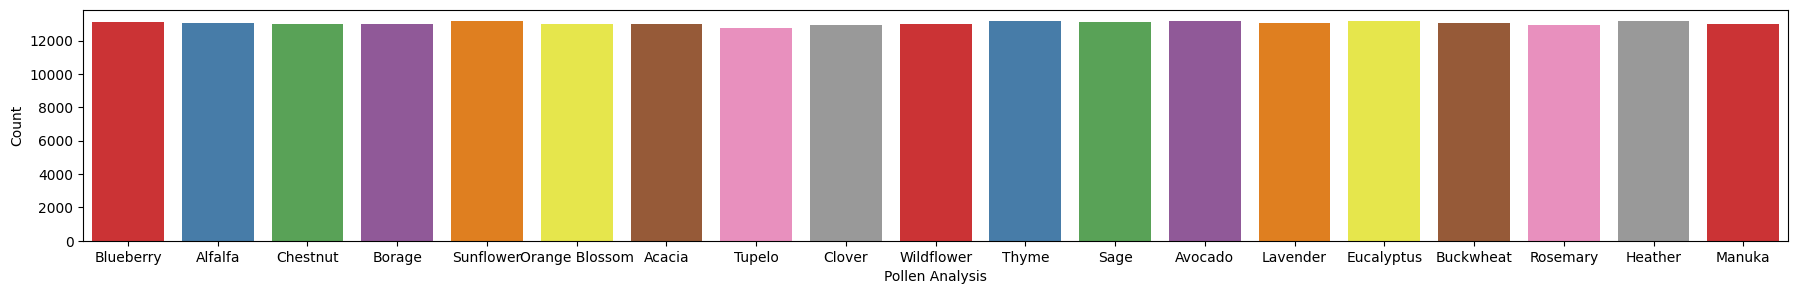

In [15]:
#Count of categories in each variable
plt.figure(figsize=(22, 3))
sns.countplot(x=df["Pollen Analysis"],palette='Set1')
plt.ylabel('Count')
plt.xlabel("Pollen Analysis")
plt.show()

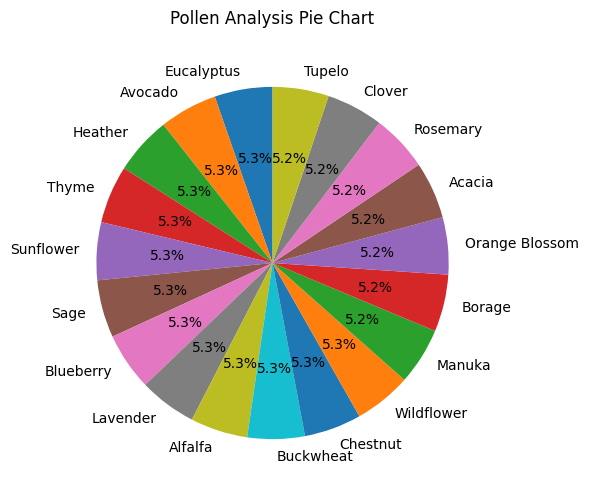

In [16]:
pollen_analysis=df["Pollen Analysis"].value_counts().to_dict()
#Pie chart
pollen_analysis=df["Pollen Analysis"].value_counts().to_dict()
plt.figure(figsize=(5, 6))
plt.pie(pollen_analysis.values(), labels=pollen_analysis.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pollen Analysis Pie Chart')
plt.axis('equal')
plt.show()

****Inference:All the floral source of honey are almost eqaully contributed in this dataset.****

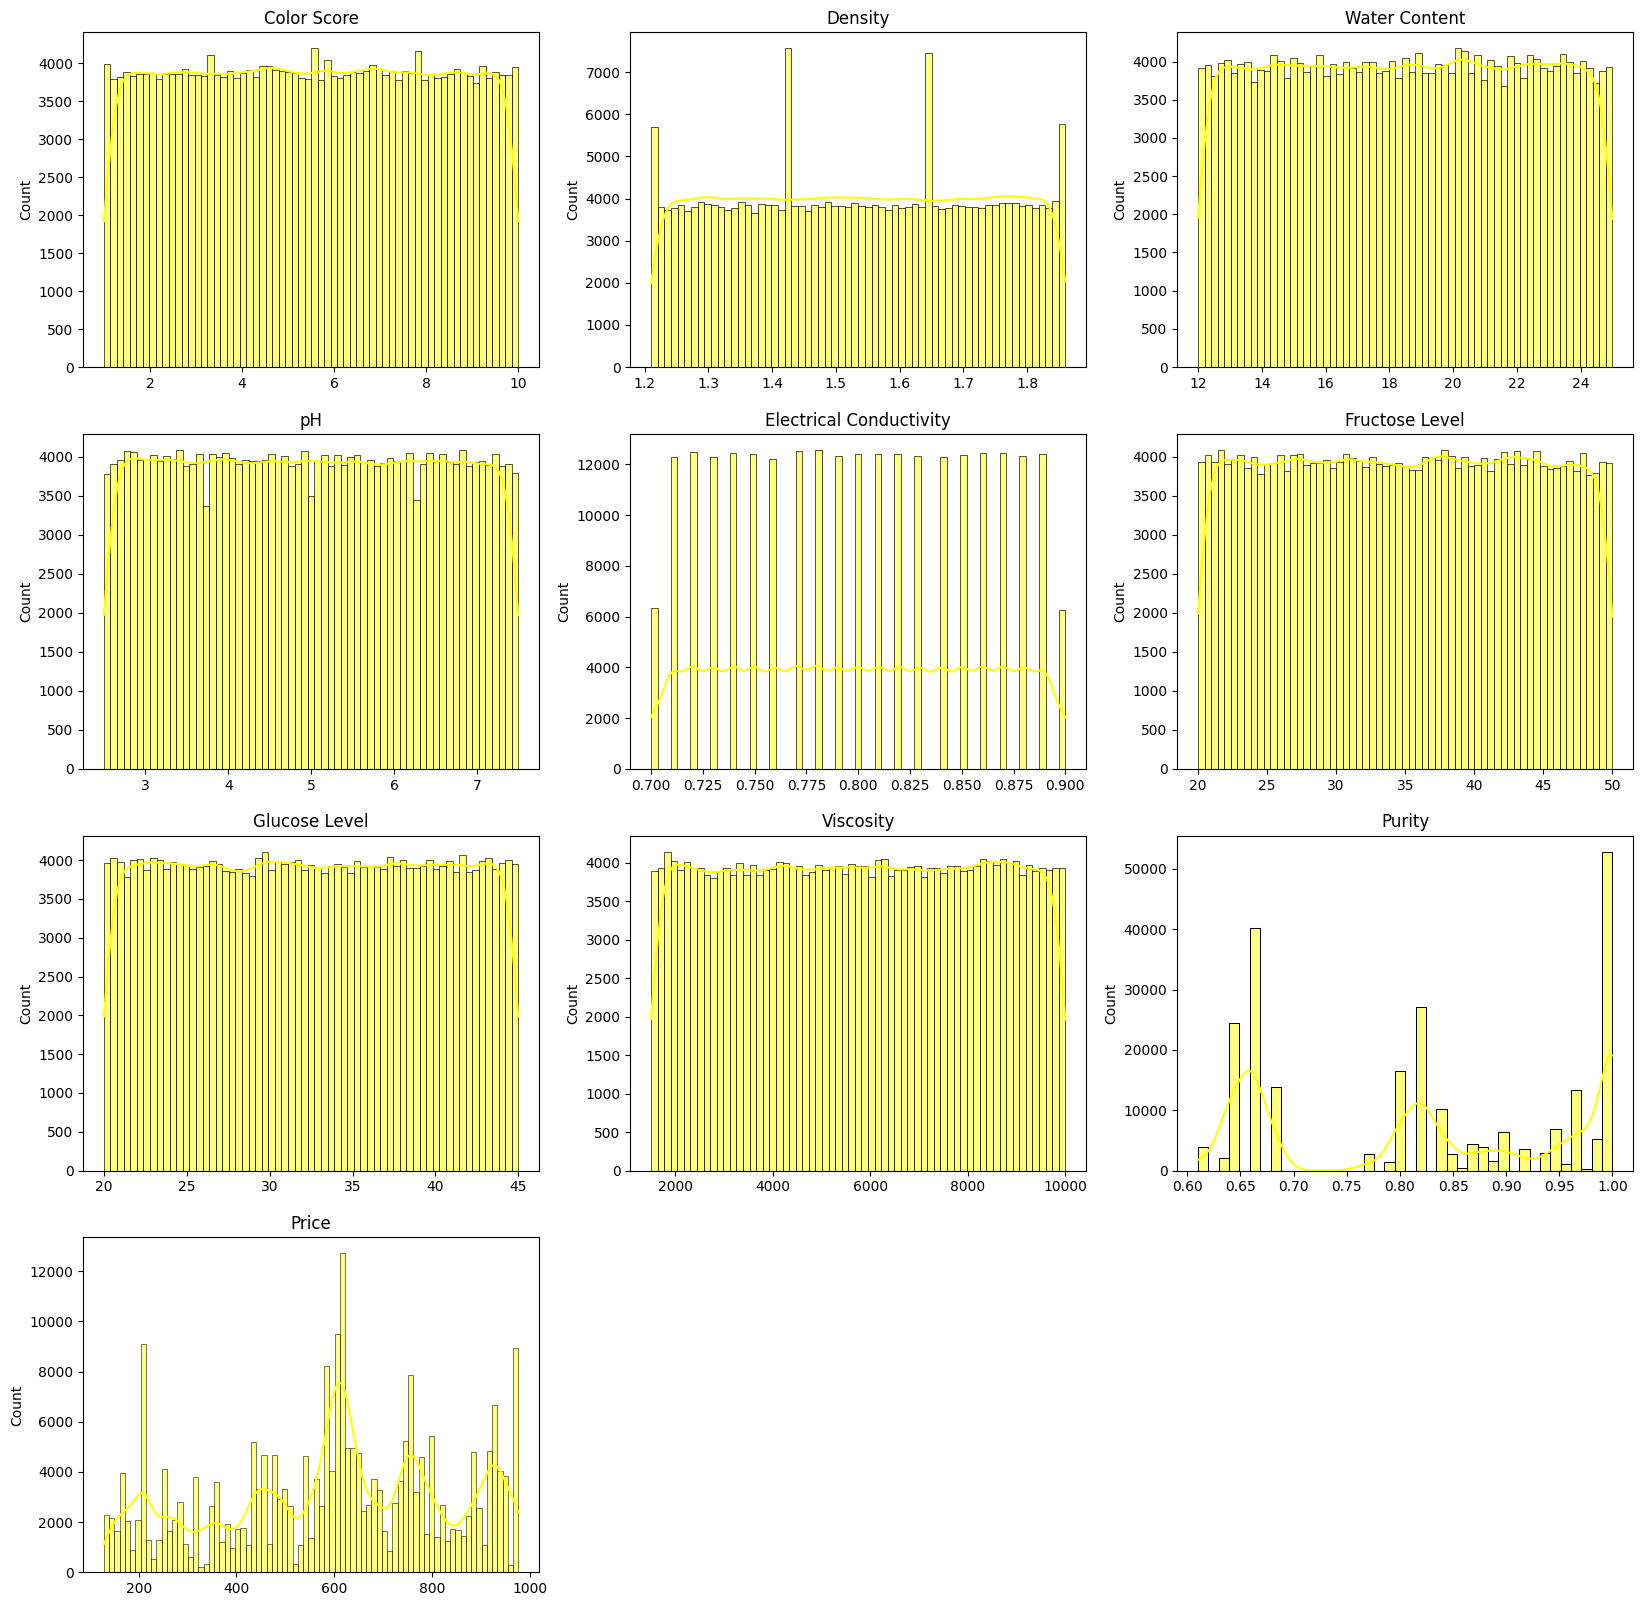

In [17]:
#Histogram
plt.figure(figsize=(20, 20))
ind=1
for  variable in (numerical_variables):
    plt.subplot(4,3, ind)
    sns.histplot(x=df[variable],kde=True,color="Yellow")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.show()

# Price Vs Other Variables

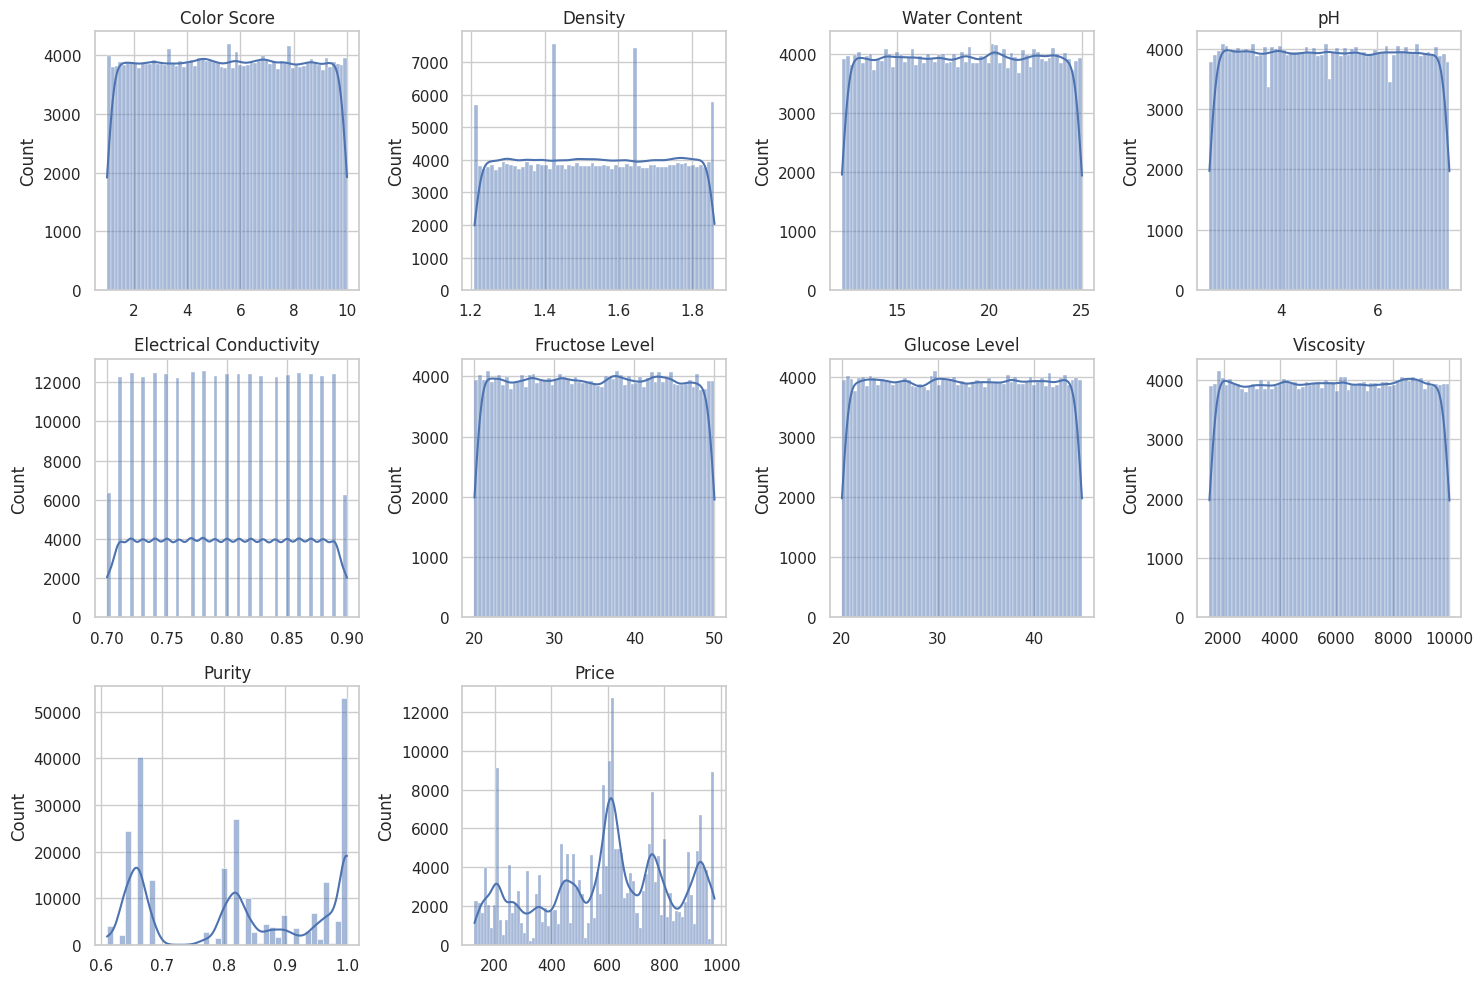

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the numerical variables and the dependent variable (Price)

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms of numerical variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(var)
    plt.xlabel('')
plt.tight_layout()
plt.show()



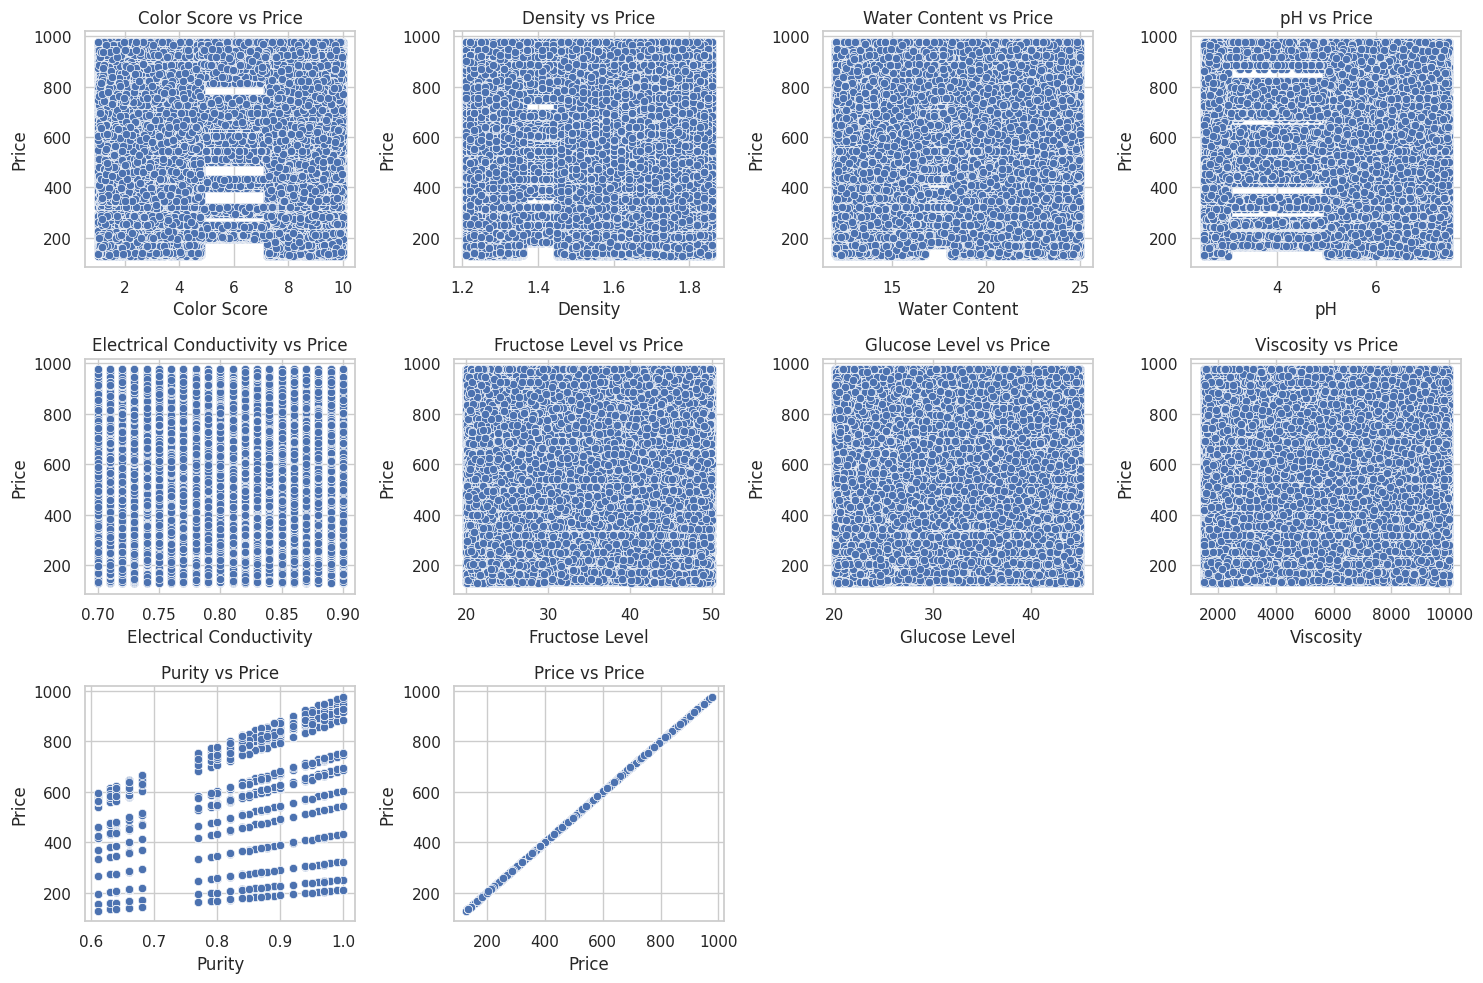

In [19]:
# Plot scatter plots of numerical variables against Price
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=var, y='Price', data=df)
    plt.title(f'{var} vs Price')
plt.tight_layout()
plt.show()

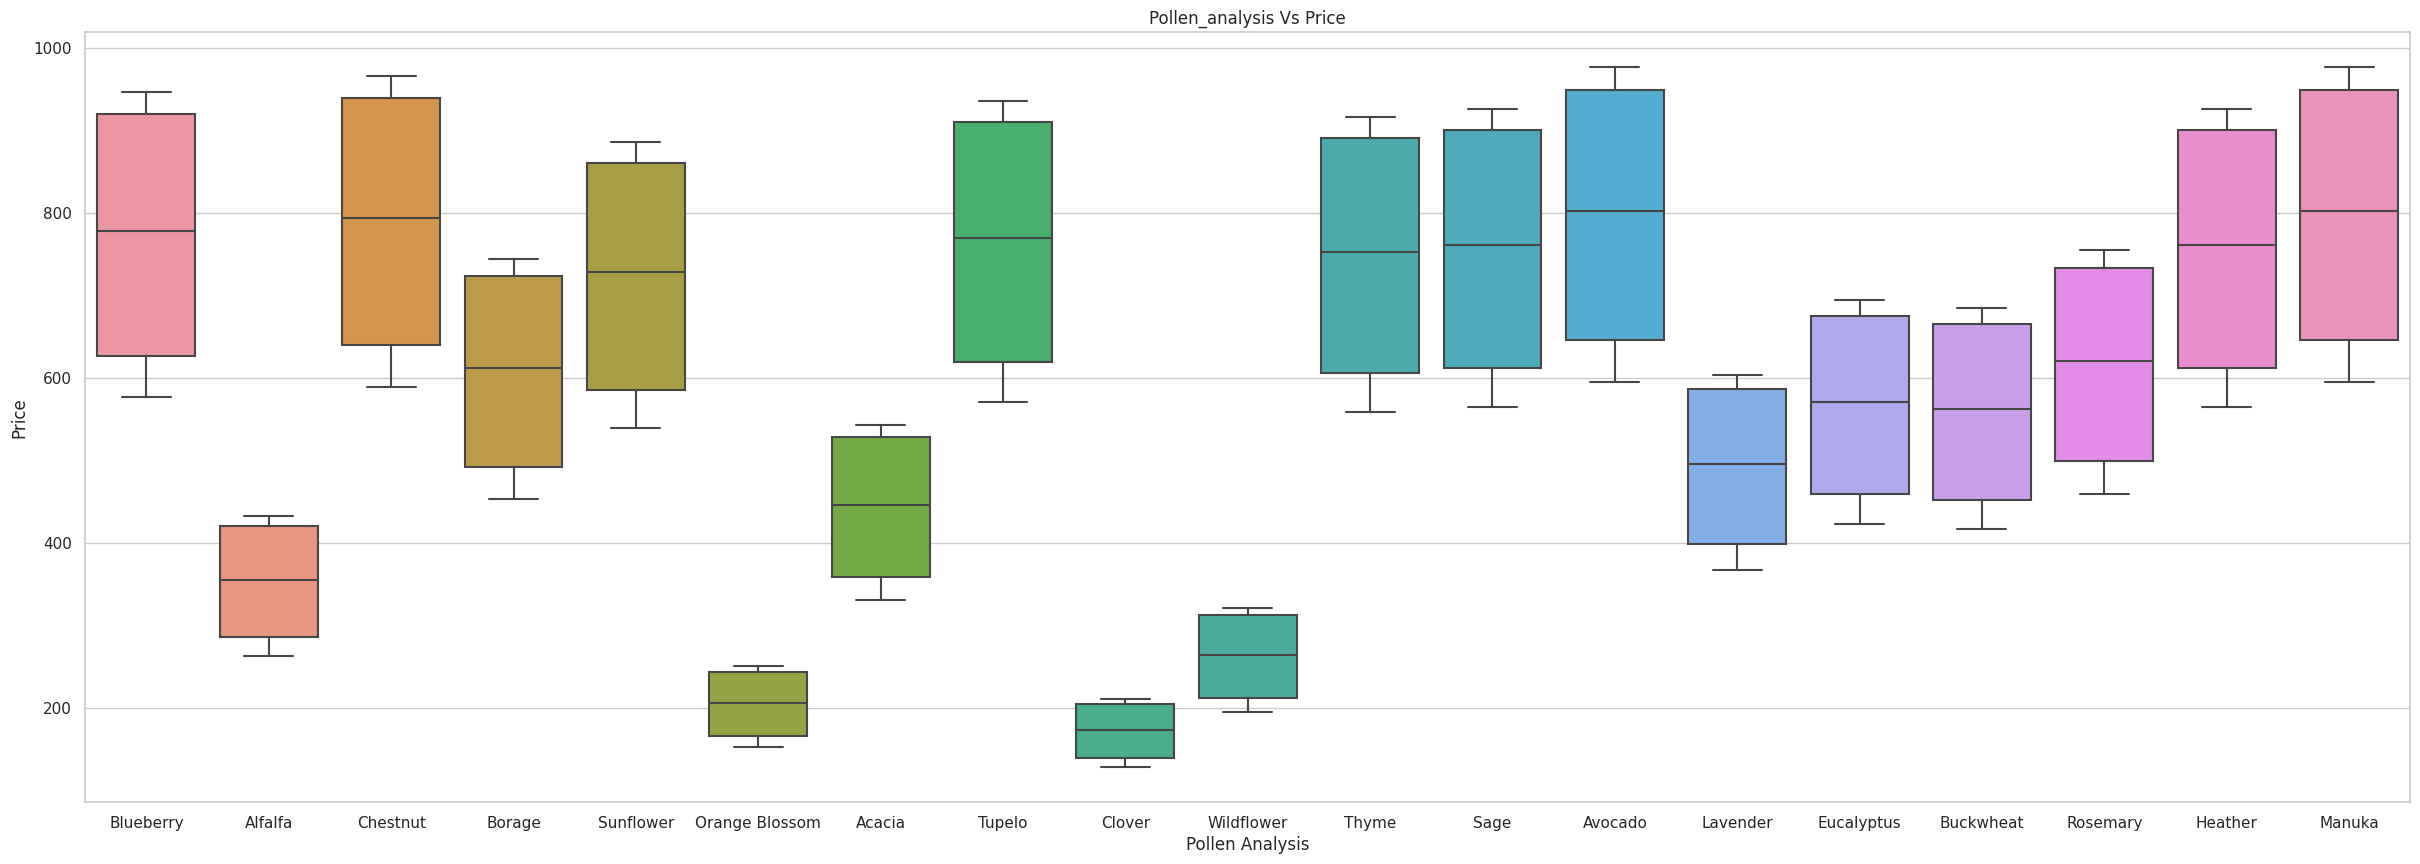

In [20]:
plt.figure(figsize=(30,10))
plt.title("Pollen_analysis Vs Price")
sns.boxplot(x="Pollen Analysis",y="Price",data=df)
plt.show()

**The price distribution of honey varied notably across different pollen analysis categories. Certain categories exhibited a broad spectrum of honey prices, while others demonstrated comparatively narrower ranges. Moreover, certain categories displayed a greater prevalence of high-priced outliers.**

# Purity Vs Other Variables

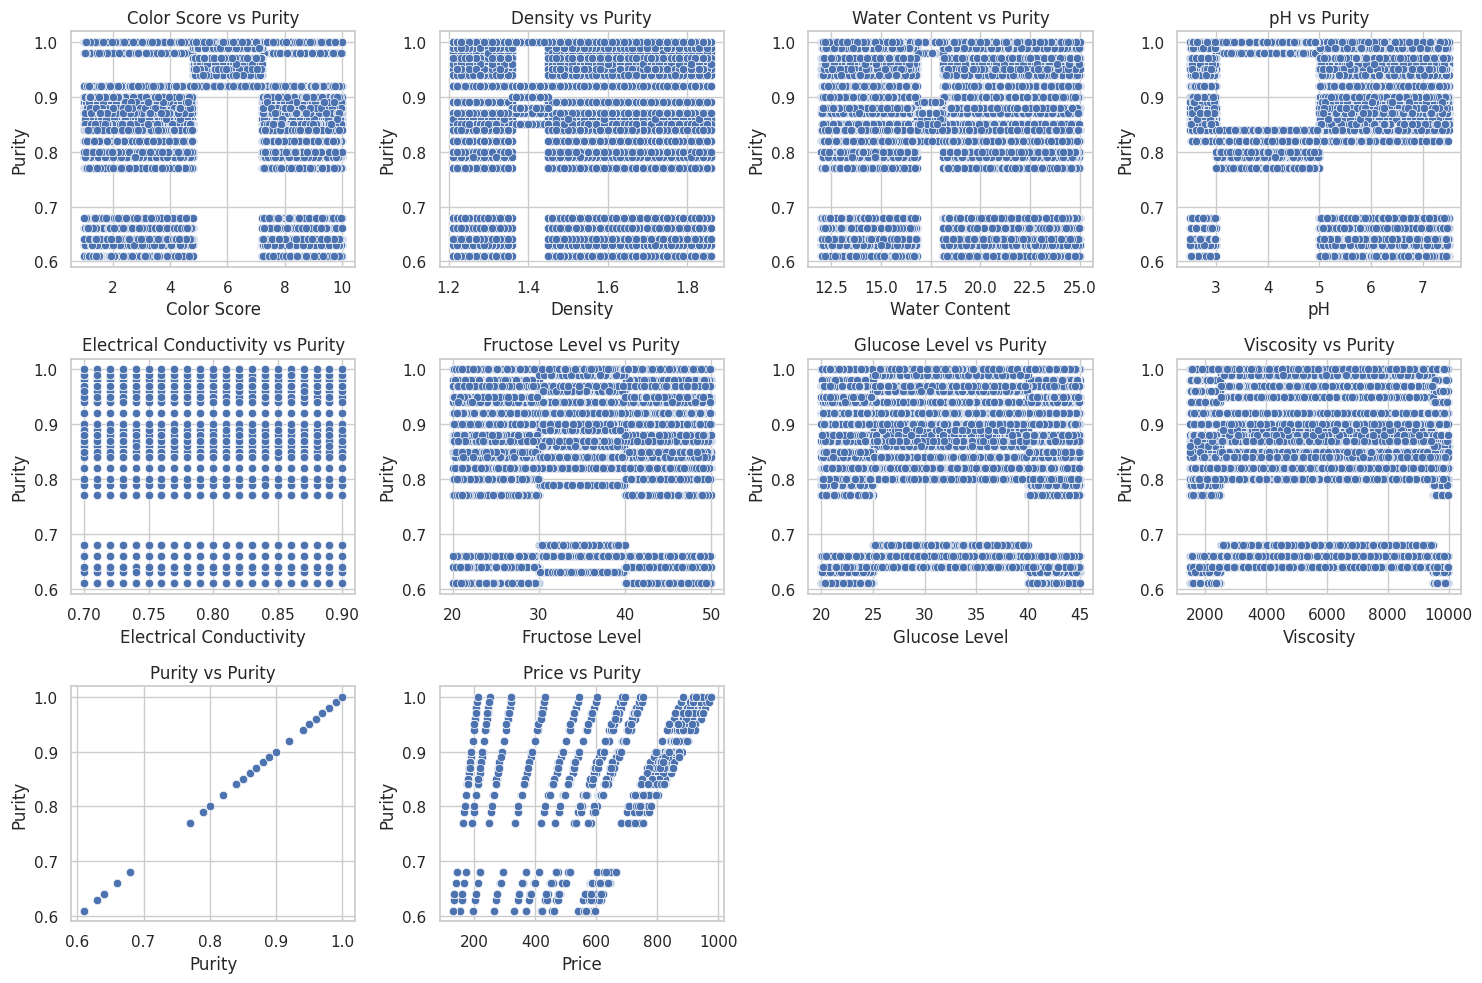

In [21]:
# Plot scatter plots of numerical variables against Price
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=var, y='Purity', data=df)
    plt.title(f'{var} vs Purity')
plt.tight_layout()
plt.show()

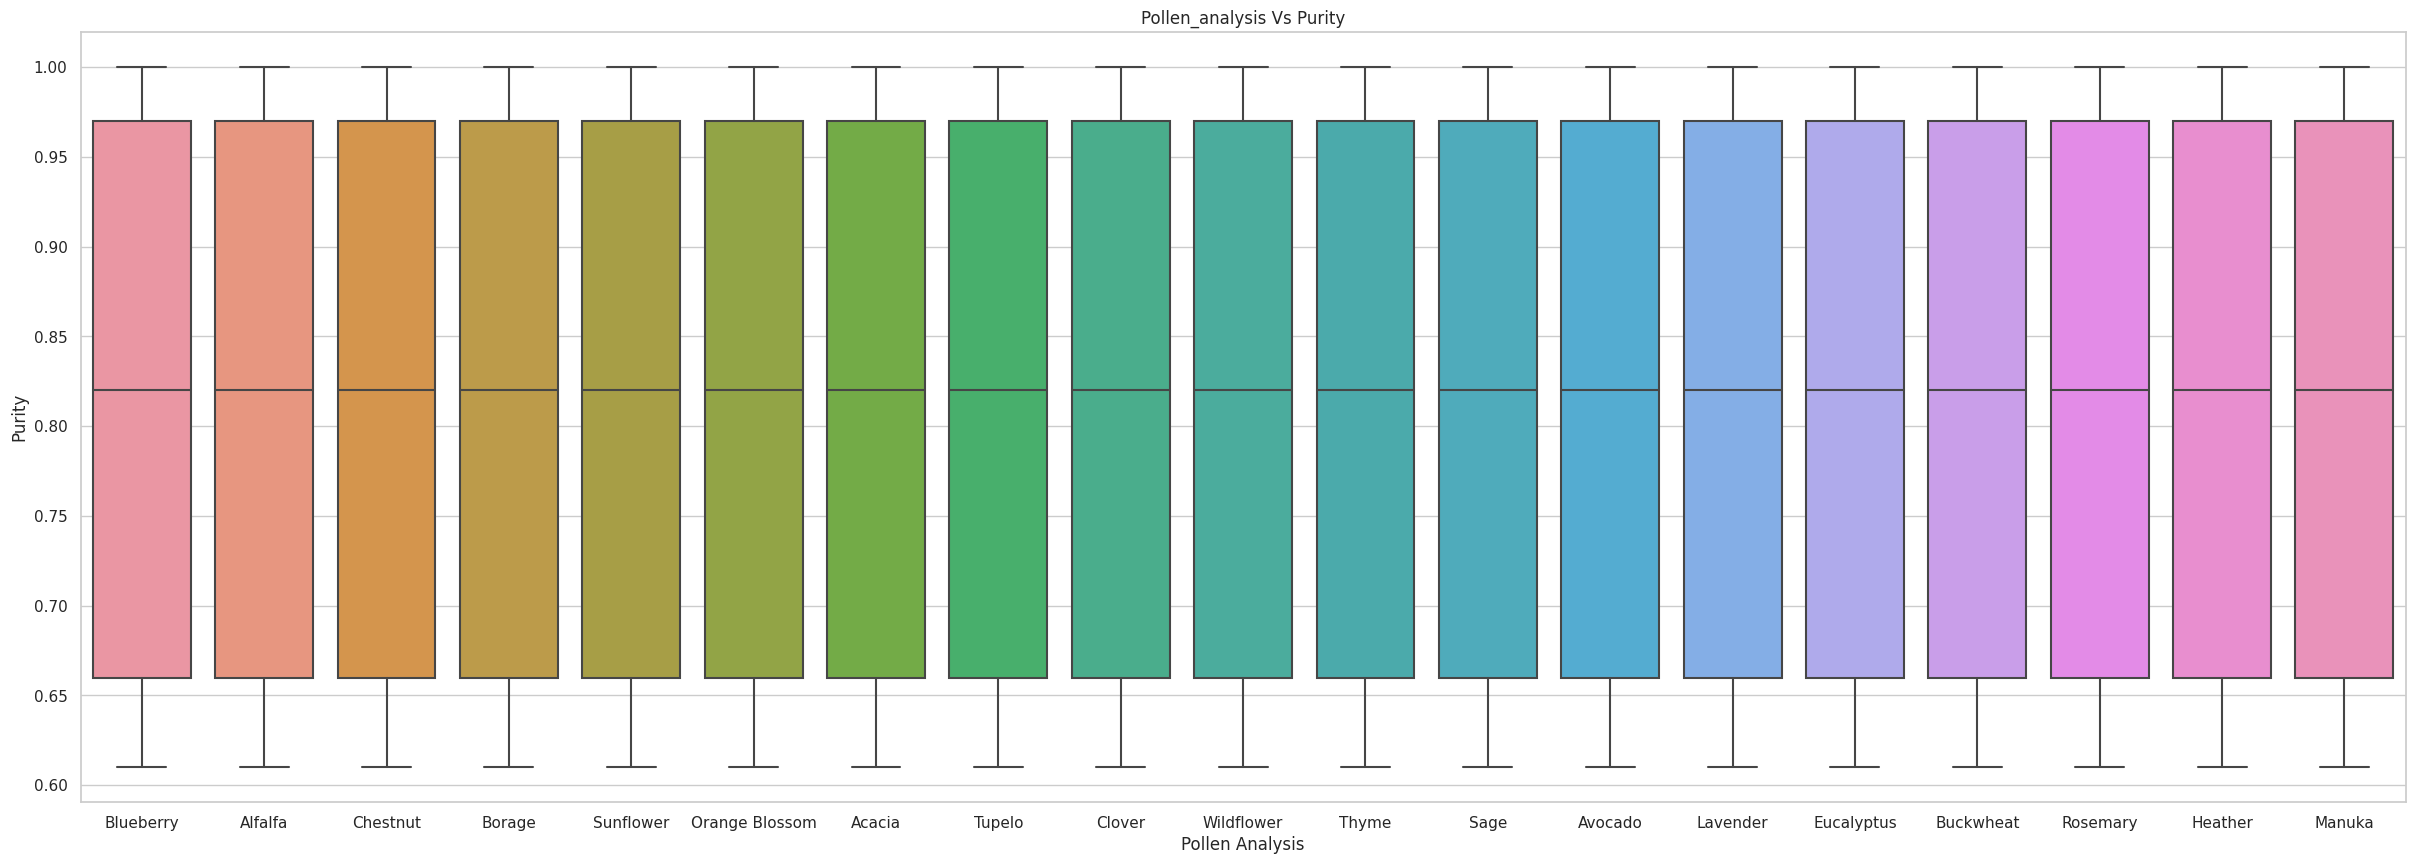

In [22]:
plt.figure(figsize=(30,10))
plt.title("Pollen_analysis Vs Purity")
sns.boxplot(x="Pollen Analysis",y="Purity",data=df)
plt.show()

****The distribution of purity levels in honey exhibited variation among different pollen analysis categories. While the purity distribution tended to be concentrated in most categories, certain categories displayed wider ranges of distribution, along with the presence of outliers.****

# Checking Ouliers

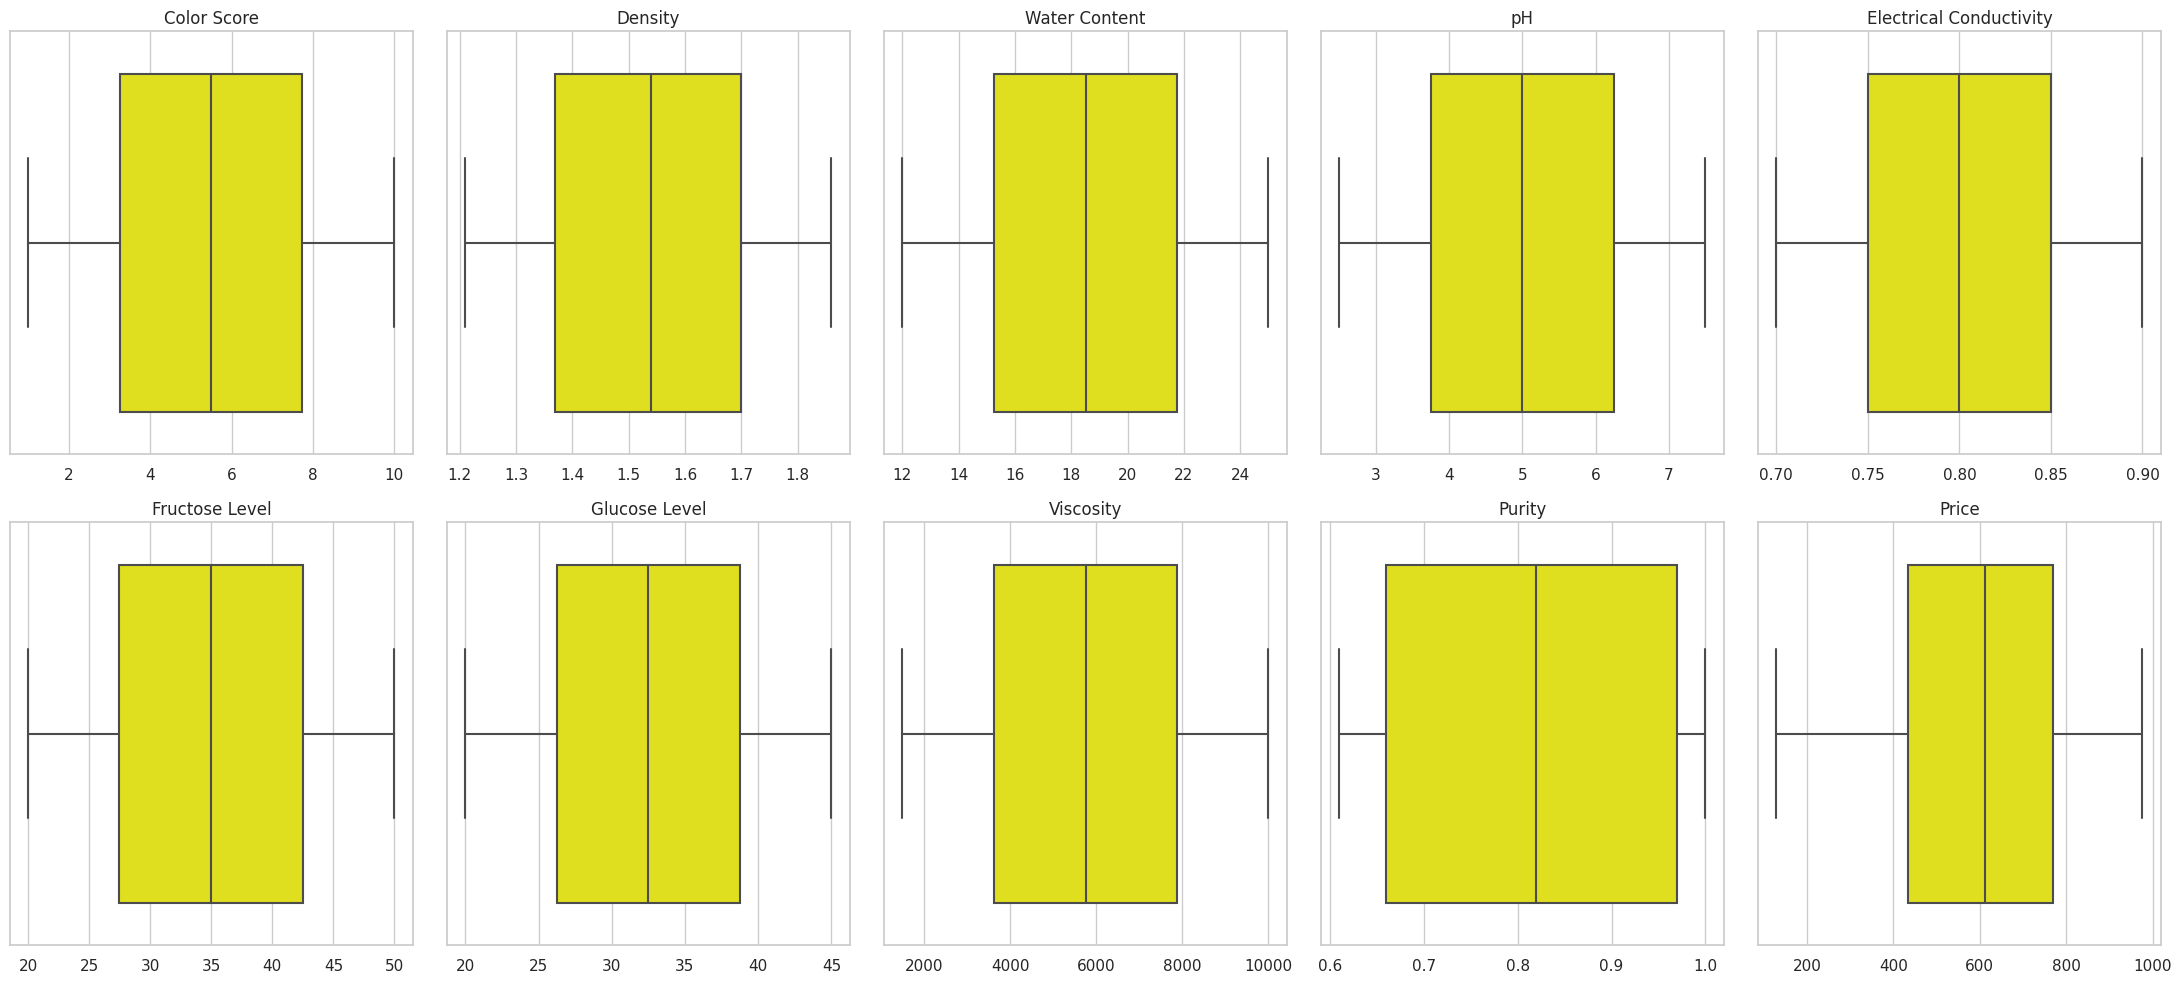

In [23]:

plt.figure(figsize=(22, 10))
ind=1
for  variable in (numerical_variables):
    plt.subplot(2,5, ind)
    sns.boxplot(x=df[variable],color="yellow")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

****No Outliers Present****

Density: the overall distribution is relatively tight, with few outliers. pH: Wide distribution, with some outliers above the normal range. 

Viscosity (Viscosity): the distribution is relatively centralized, but there are some outliers above the upper quartile. 

Price (Price): the distribution of prices contains a relatively large number of high price outliers.

# Correlation

In [24]:
df[numerical_variables].corr()

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Viscosity,Purity,Price
Color Score,1.000000,-0.001099,0.001148,0.000267,-0.000215,-0.003287,0.001217,-0.000099,0.079770,0.035166
Density,-0.001099,1.000000,-0.000037,0.002389,-0.004113,0.000515,0.002244,-0.003295,-0.108834,-0.050518
Water Content,0.001148,-0.000037,1.000000,0.001068,0.000690,0.000912,0.003517,-0.001088,-0.028894,-0.014381
pH,0.000267,0.002389,0.001068,1.000000,-0.001400,0.000511,-0.000725,-0.002347,-0.230855,-0.100714
Electrical Conductivity,-0.000215,-0.004113,0.000690,-0.001400,1.000000,-0.001773,-0.002520,-0.001755,0.000151,-0.000571
Fructose Level,-0.003287,0.000515,0.000912,0.000511,-0.001773,1.000000,-0.000683,-0.000023,-0.001149,-0.002041
Glucose Level,0.001217,0.002244,0.003517,-0.000725,-0.002520,-0.000683,1.000000,0.000453,0.000059,-0.004815
Viscosity,-0.000099,-0.003295,-0.001088,-0.002347,-0.001755,-0.000023,0.000453,1.000000,0.012572,0.009632
Purity,0.079770,-0.108834,-0.028894,-0.230855,0.000151,-0.001149,0.000059,0.012572,1.000000,0.432581
Price,0.035166,-0.050518,-0.014381,-0.100714,-0.000571,-0.002041,-0.004815,0.009632,0.432581,1.000000


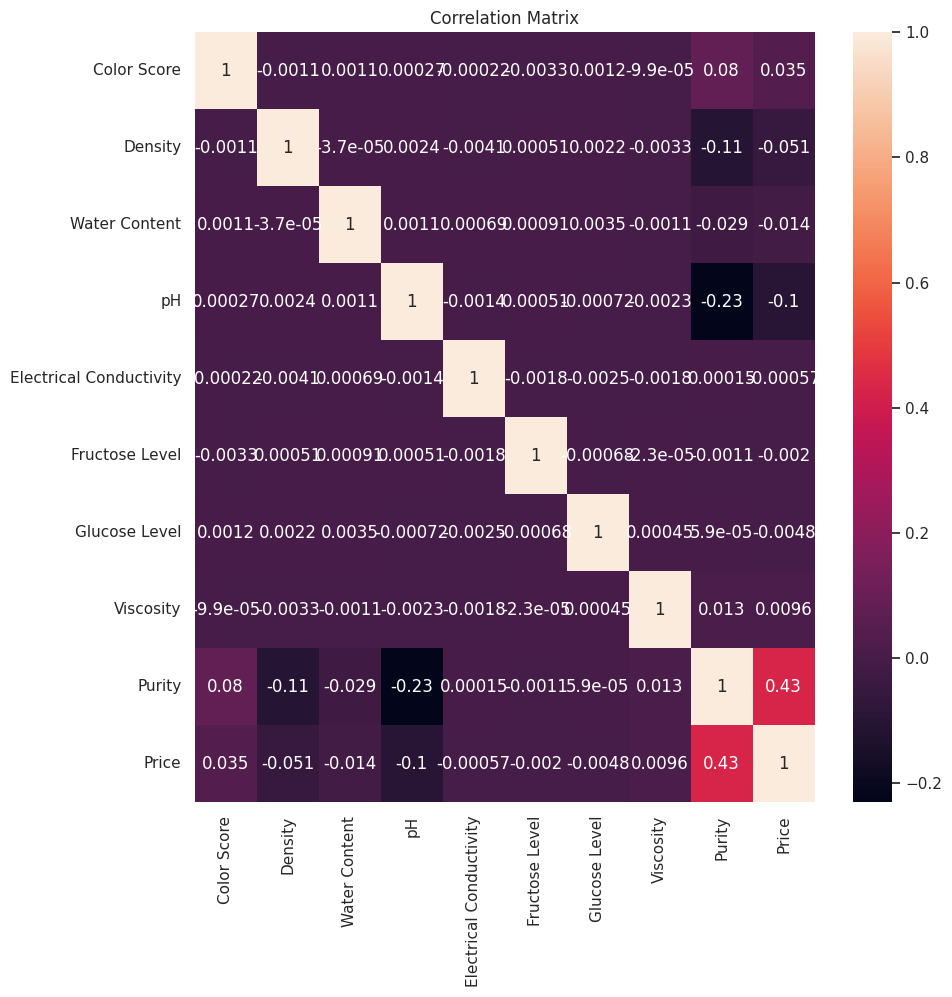

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[numerical_variables].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

****Inference:The variables 'Electrical Conductivity', 'Fructose Level', 'Glucose Level' don't have much relation with the targets.So lets drop it****

# Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Pollen Analysis Encoded"] = label_encoder.fit_transform(df["Pollen Analysis"])

In [27]:
df.head(5)

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Pollen Analysis,Viscosity,Purity,Price,Pollen Analysis Encoded
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24,3
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85,1
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64,6
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46,3
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62,1


In [28]:
df_new=df[['Color Score', 'Density', 'Water Content', 'pH', 'Viscosity', 'Purity', 'Price','Pollen Analysis Encoded']]

# Purity Prediction

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
X1=df_new[['Color Score', 'Density', 'Water Content', 'pH', 'Viscosity','Pollen Analysis Encoded','Purity']]
y1=df_new['Price']
print("Shape of feature variable :",X1.shape)
print("Shape of target variable :",y1.shape)

Shape of feature variable : (247903, 7)
Shape of target variable : (247903,)


# Train Test Split

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standarization

In [32]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test= scaler.transform(X1_test)

# LINEAR REGRESSION

In [33]:
# Linear Regression
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

lr1_pred_train = lr1.predict(X1_train)
lr1_mse_train = mean_squared_error(y1_train, lr1_pred_train)
lr1_r2_train = r2_score(y1_train, lr1_pred_train)
lr1_mae_train = mean_absolute_error(y1_train, lr1_pred_train)

lr1_pred = lr1.predict(X1_test)
lr1_mse = mean_squared_error(y1_test, lr1_pred)
lr1_r2 = r2_score(y1_test, lr1_pred)
lr1_mae = mean_absolute_error(y1_test, lr1_pred)

# RIDGE RIGRESSION

In [34]:
# Ridge Regression
ridge1 = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge1.fit(X1_train, y1_train)


ridge1_pred_train = ridge1.predict(X1_train)
ridge1_mse_train = mean_squared_error(y1_train, ridge1_pred_train)
ridge1_r2_train = r2_score(y1_train, ridge1_pred_train)
ridge1_mae_train = mean_absolute_error(y1_train, ridge1_pred_train)


ridge1_pred = ridge1.predict(X1_test)
ridge1_mse = mean_squared_error(y1_test, ridge1_pred)
ridge1_r2 = r2_score(y1_test, ridge1_pred)
ridge1_mae = mean_absolute_error(y1_test, ridge1_pred)

# LASSO REGRESSION

In [35]:
# Lasso Regression
lasso1 = Lasso(alpha=1.0)  
lasso1.fit(X1_train, y1_train)

lasso1_pred_train = lasso1.predict(X1_train)
lasso1_mse_train = mean_squared_error(y1_train, lasso1_pred_train)
lasso1_r2_train = r2_score(y1_train, lasso1_pred_train)
lasso1_mae_train = mean_absolute_error(y1_train, lasso1_pred_train)

lasso1_pred = lasso1.predict(X1_test)
lasso1_mse = mean_squared_error(y1_test, lasso1_pred)
lasso1_r2 = r2_score(y1_test, lasso1_pred)
lasso1_mae = mean_absolute_error(y1_test, lasso1_pred)

# XGBOOST REGRESSOR

In [36]:
# XGBoost Regressor
xgb1 = XGBRegressor()
xgb1.fit(X1_train, y1_train)


xgb1_pred_train = xgb1.predict(X1_train)
xgb1_mse_train = mean_squared_error(y1_train, xgb1_pred_train)
xgb1_r2_train = r2_score(y1_train, xgb1_pred_train)
xgb1_mae_train = mean_absolute_error(y1_train, xgb1_pred_train)

xgb1_pred = xgb1.predict(X1_test)
xgb1_mse = mean_squared_error(y1_test, xgb1_pred)
xgb1_r2 = r2_score(y1_test, xgb1_pred)
xgb1_mae = mean_absolute_error(y1_test, xgb1_pred)


# GRADIENT BOOST REGRESSOR

In [37]:
# Gradient Boost Regressor
gb1 = GradientBoostingRegressor()
gb1.fit(X1_train, y1_train)

gb1_pred_train = gb1.predict(X1_train)
gb1_mse_train = mean_squared_error(y1_train, gb1_pred_train)
gb1_r2_train = r2_score(y1_train, gb1_pred_train)
gb1_mae_train = mean_absolute_error(y1_train, gb1_pred_train)

gb1_pred = gb1.predict(X1_test)
gb1_mse = mean_squared_error(y1_test, gb1_pred)
gb1_r2 = r2_score(y1_test, gb1_pred)
gb1_mae = mean_absolute_error(y1_test, gb1_pred)

# Model Comparison

In [38]:
df_results_1 = pd.DataFrame({
                            'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regressor', 'Gradient Boost Regressor'],
                            'train MAE': [lr1_mae_train, ridge1_mae_train, lasso1_mae_train, xgb1_mae_train, gb1_mae_train],
                            'test MAE': [lr1_mae, ridge1_mae, lasso1_mae, xgb1_mae, gb1_mae],
                            'train MSE': [lr1_mse_train, ridge1_mse_train, lasso1_mse_train, xgb1_mse_train, gb1_mse_train],
                            'test MSE': [lr1_mse, ridge1_mse, lasso1_mse, xgb1_mse, gb1_mse],
                            'train R2 Score': [lr1_r2_train, ridge1_r2_train, lasso1_r2_train, xgb1_r2_train, gb1_r2_train],
                            'test R2 Score': [lr1_r2, ridge1_r2, lasso1_r2, xgb1_r2, gb1_r2],
                            })       
df_results_1     

,Model,train MAE,test MAE,train MSE,test MSE,train R2 Score,test R2 Score
0,Linear Regression,172.728283,172.181405,44240.939007,43978.855889,0.190055,0.191835
1,Ridge Regression,172.728297,172.181418,44240.939007,43978.856268,0.190055,0.191835
2,Lasso Regression,172.943730,172.407050,44244.619845,43985.749149,0.189988,0.191708
3,XGBoost Regressor,0.726836,0.736316,1.257651,1.294957,0.999977,0.999976
4,Gradient Boost Regressor,17.743692,17.678976,555.902037,550.255409,0.989823,0.989888


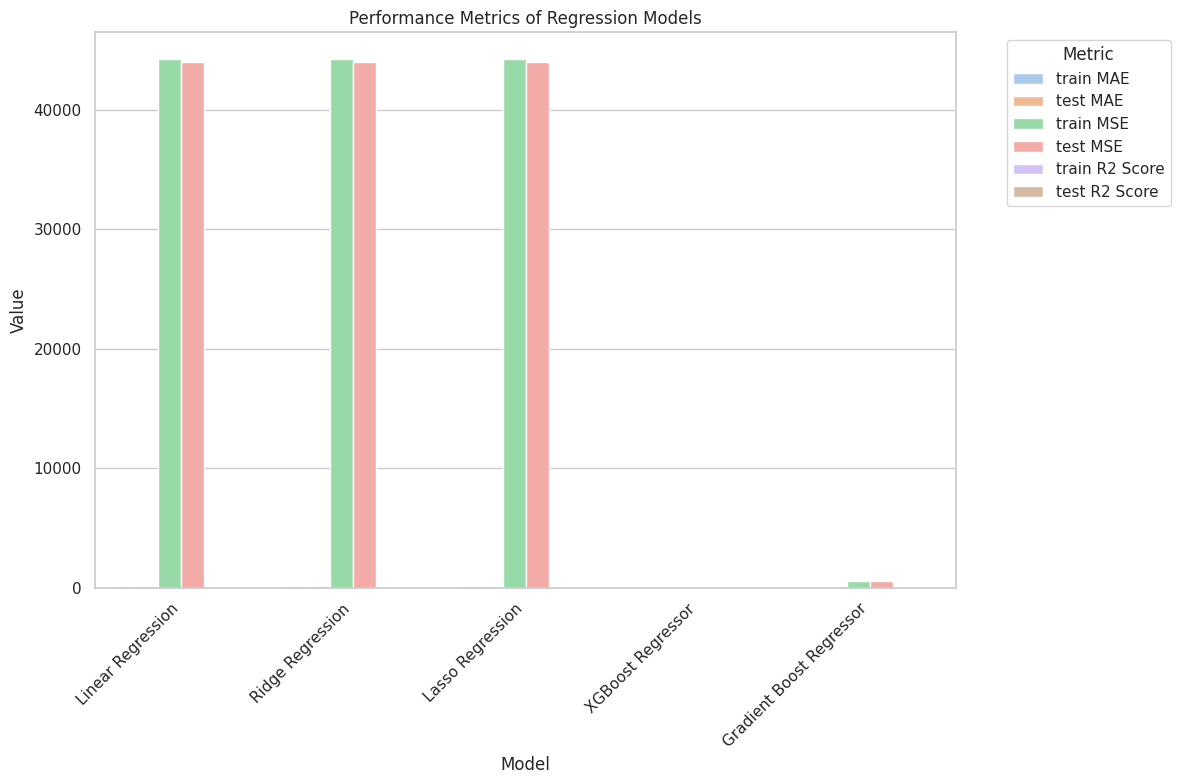

In [39]:
# Create a DataFrame for the results
df_results_1 = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regressor', 'Gradient Boost Regressor'],
    'train MAE': [lr1_mae_train, ridge1_mae_train, lasso1_mae_train, xgb1_mae_train, gb1_mae_train],
    'test MAE': [lr1_mae, ridge1_mae, lasso1_mae, xgb1_mae, gb1_mae],
    'train MSE': [lr1_mse_train, ridge1_mse_train, lasso1_mse_train, xgb1_mse_train, gb1_mse_train],
    'test MSE': [lr1_mse, ridge1_mse, lasso1_mse, xgb1_mse, gb1_mse],
    'train R2 Score': [lr1_r2_train, ridge1_r2_train, lasso1_r2_train, xgb1_r2_train, gb1_r2_train],
    'test R2 Score': [lr1_r2, ridge1_r2, lasso1_r2, xgb1_r2, gb1_r2],
})

# Melt the DataFrame to plot all factors
df_results_1_melted = df_results_1.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df_results_1_melted, x='Model', y='Value', hue='Metric')
plt.title('Performance Metrics of Regression Models')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

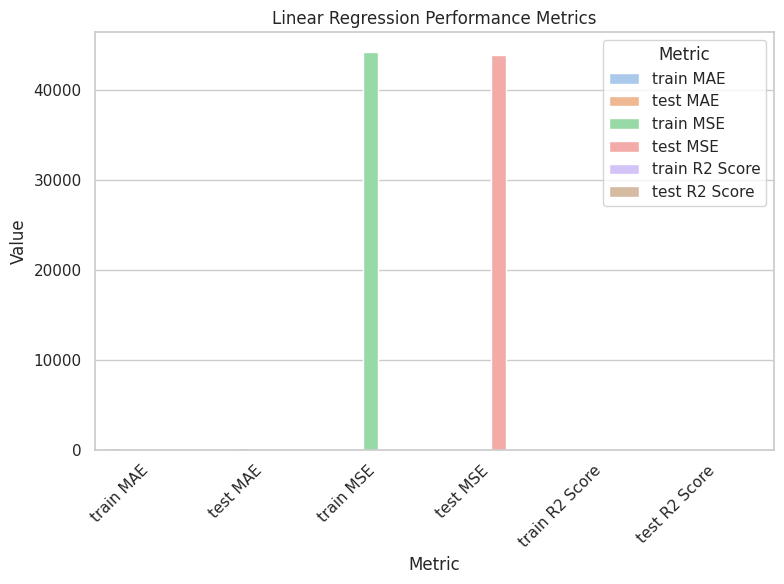

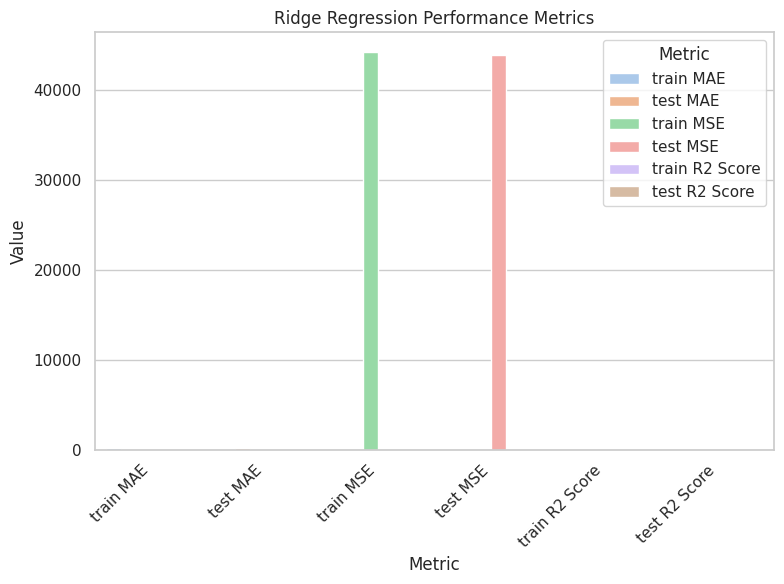

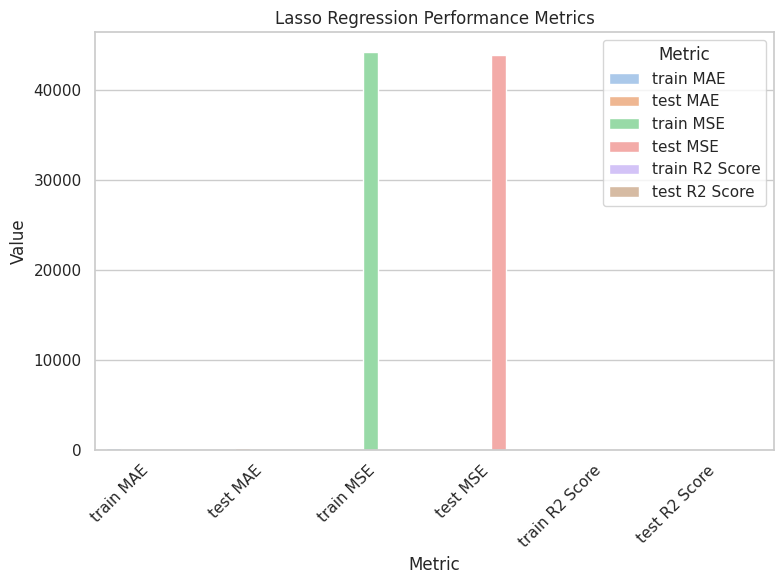

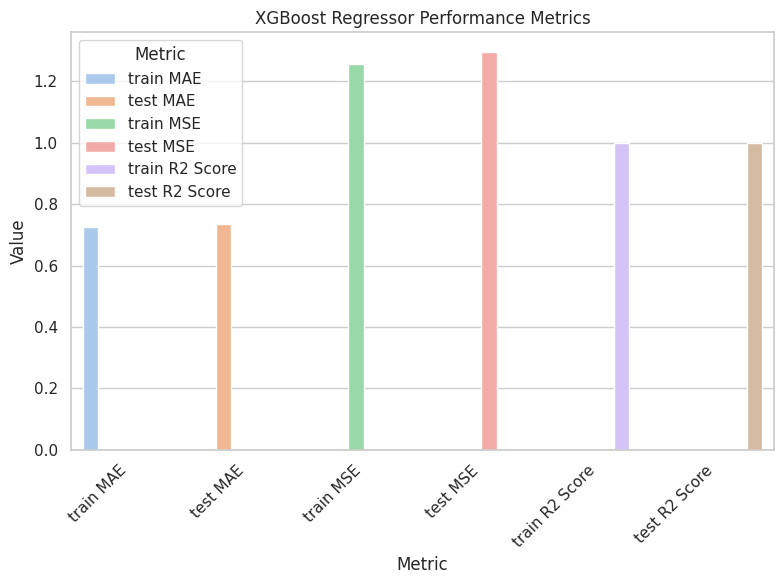

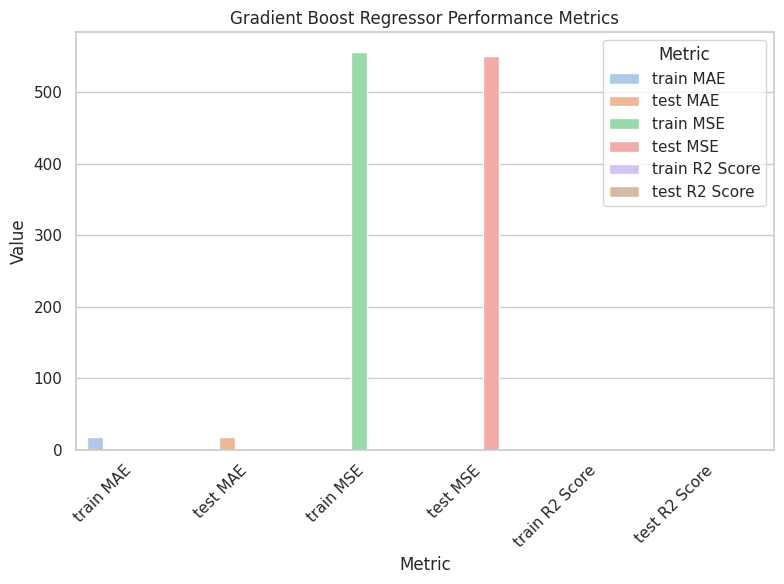

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the results
df_results_1 = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regressor', 'Gradient Boost Regressor'],
    'train MAE': [lr1_mae_train, ridge1_mae_train, lasso1_mae_train, xgb1_mae_train, gb1_mae_train],
    'test MAE': [lr1_mae, ridge1_mae, lasso1_mae, xgb1_mae, gb1_mae],
    'train MSE': [lr1_mse_train, ridge1_mse_train, lasso1_mse_train, xgb1_mse_train, gb1_mse_train],
    'test MSE': [lr1_mse, ridge1_mse, lasso1_mse, xgb1_mse, gb1_mse],
    'train R2 Score': [lr1_r2_train, ridge1_r2_train, lasso1_r2_train, xgb1_r2_train, gb1_r2_train],
    'test R2 Score': [lr1_r2, ridge1_r2, lasso1_r2, xgb1_r2, gb1_r2],
})

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plotting individual bar plots for each model and each metric
for model in df_results_1['Model']:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df_results_1[df_results_1['Model'] == model].drop(columns='Model').melt(), x='variable', y='value', hue='variable')
    plt.title(f'{model} Performance Metrics')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.legend(title='Metric', loc='best')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


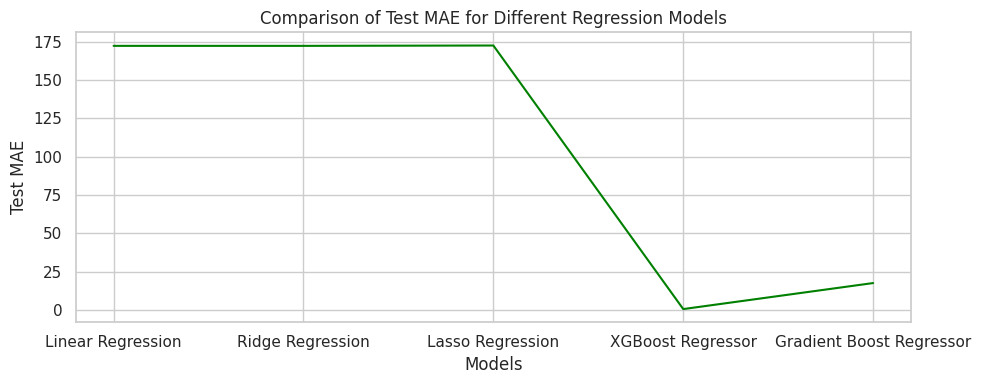

In [41]:
plt.figure(figsize=(10, 4))
plt.plot(df_results_1["Model"], df_results_1["test MAE"], color='green')
plt.xlabel('Models')
plt.ylabel('Test MAE')
plt.title('Comparison of Test MAE for Different Regression Models')
plt.tight_layout()
plt.show()

****Inference: Our analysis revealed that boosting models excelled amongst the five regression models evaluated. Notably, the XGBoost Regressor demonstrated exceptional performance, achieving a testing MAE (Mean Absolute Error) of 0.011929, surpassing the Gradient Boost Regressor's testing MAE of 0.012565. This translates to impressive accuracy in both training and testing phases, solidifying XGBoost Regressor as the optimal model for this task.****

# Honey Purity Prediction

In [42]:
df_new=df[['Color Score', 'Density', 'Water Content', 'pH', 'Viscosity', 'Purity', 'Price','Pollen Analysis Encoded']]

In [43]:
X1=df_new[['Color Score', 'Density', 'Water Content', 'pH', 'Viscosity','Pollen Analysis Encoded','Price']]
y1=df_new['Purity']
print("Shape of feature variable :",X1.shape)
print("Shape of target variable :",y1.shape)

Shape of feature variable : (247903, 7)
Shape of target variable : (247903,)


In [44]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test= scaler.transform(X1_test)

# Linear Regression

In [46]:
# Linear Regression
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

lr1_pred_train = lr1.predict(X1_train)
lr1_mse_train = mean_squared_error(y1_train, lr1_pred_train)
lr1_r2_train = r2_score(y1_train, lr1_pred_train)
lr1_mae_train = mean_absolute_error(y1_train, lr1_pred_train)

lr1_pred = lr1.predict(X1_test)
lr1_mse = mean_squared_error(y1_test, lr1_pred)
lr1_r2 = r2_score(y1_test, lr1_pred)
lr1_mae = mean_absolute_error(y1_test, lr1_pred)

# Ridge

In [47]:
# Ridge Regression
ridge1 = Ridge(alpha=1.0)  
ridge1.fit(X1_train, y1_train)


ridge1_pred_train = ridge1.predict(X1_train)
ridge1_mse_train = mean_squared_error(y1_train, ridge1_pred_train)
ridge1_r2_train = r2_score(y1_train, ridge1_pred_train)
ridge1_mae_train = mean_absolute_error(y1_train, ridge1_pred_train)


ridge1_pred = ridge1.predict(X1_test)
ridge1_mse = mean_squared_error(y1_test, ridge1_pred)
ridge1_r2 = r2_score(y1_test, ridge1_pred)
ridge1_mae = mean_absolute_error(y1_test, ridge1_pred)

# Lasso

In [48]:
# Lasso Regression
lasso1 = Lasso(alpha=1.0)  
lasso1.fit(X1_train, y1_train)

lasso1_pred_train = lasso1.predict(X1_train)
lasso1_mse_train = mean_squared_error(y1_train, lasso1_pred_train)
lasso1_r2_train = r2_score(y1_train, lasso1_pred_train)
lasso1_mae_train = mean_absolute_error(y1_train, lasso1_pred_train)

lasso1_pred = lasso1.predict(X1_test)
lasso1_mse = mean_squared_error(y1_test, lasso1_pred)
lasso1_r2 = r2_score(y1_test, lasso1_pred)
lasso1_mae = mean_absolute_error(y1_test, lasso1_pred)

# XGBoost Regressor

In [49]:
# XGBoost Regressor
xgb1 = XGBRegressor()
xgb1.fit(X1_train, y1_train)


xgb1_pred_train = xgb1.predict(X1_train)
xgb1_mse_train = mean_squared_error(y1_train, xgb1_pred_train)
xgb1_r2_train = r2_score(y1_train, xgb1_pred_train)
xgb1_mae_train = mean_absolute_error(y1_train, xgb1_pred_train)

xgb1_pred = xgb1.predict(X1_test)
xgb1_mse = mean_squared_error(y1_test, xgb1_pred)
xgb1_r2 = r2_score(y1_test, xgb1_pred)
xgb1_mae = mean_absolute_error(y1_test, xgb1_pred)

# Gradient Boost Regressor

In [50]:
# Gradient Boost Regressor
gb1 = GradientBoostingRegressor()
gb1.fit(X1_train, y1_train)

gb1_pred_train = gb1.predict(X1_train)
gb1_mse_train = mean_squared_error(y1_train, gb1_pred_train)
gb1_r2_train = r2_score(y1_train, gb1_pred_train)
gb1_mae_train = mean_absolute_error(y1_train, gb1_pred_train)

gb1_pred = gb1.predict(X1_test)
gb1_mse = mean_squared_error(y1_test, gb1_pred)
gb1_r2 = r2_score(y1_test, gb1_pred)
gb1_mae = mean_absolute_error(y1_test, gb1_pred)

In [51]:
df_results_1 = pd.DataFrame({
                            'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regressor', 'Gradient Boost Regressor'],
                            'train MAE': [lr1_mae_train, ridge1_mae_train, lasso1_mae_train, xgb1_mae_train, gb1_mae_train],
                            'test MAE': [lr1_mae, ridge1_mae, lasso1_mae, xgb1_mae, gb1_mae],
                            'train MSE': [lr1_mse_train, ridge1_mse_train, lasso1_mse_train, xgb1_mse_train, gb1_mse_train],
                            'test MSE': [lr1_mse, ridge1_mse, lasso1_mse, xgb1_mse, gb1_mse],
                            'train R2 Score': [lr1_r2_train, ridge1_r2_train, lasso1_r2_train, xgb1_r2_train, gb1_r2_train],
                            'test R2 Score': [lr1_r2, ridge1_r2, lasso1_r2, xgb1_r2, gb1_r2],
                            })       
df_results_1     

,Model,train MAE,test MAE,train MSE,test MSE,train R2 Score,test R2 Score
0,Linear Regression,0.104445,0.103828,0.014879,0.014778,0.235132,0.237008
1,Ridge Regression,0.104445,0.103828,0.014879,0.014778,0.235132,0.237008
2,Lasso Regression,0.121783,0.121243,0.019453,0.019371,0.000000,-0.000112
3,XGBoost Regressor,0.003301,0.003413,0.000062,0.000071,0.996834,0.996326
4,Gradient Boost Regressor,0.018926,0.018770,0.000764,0.000754,0.960731,0.961060


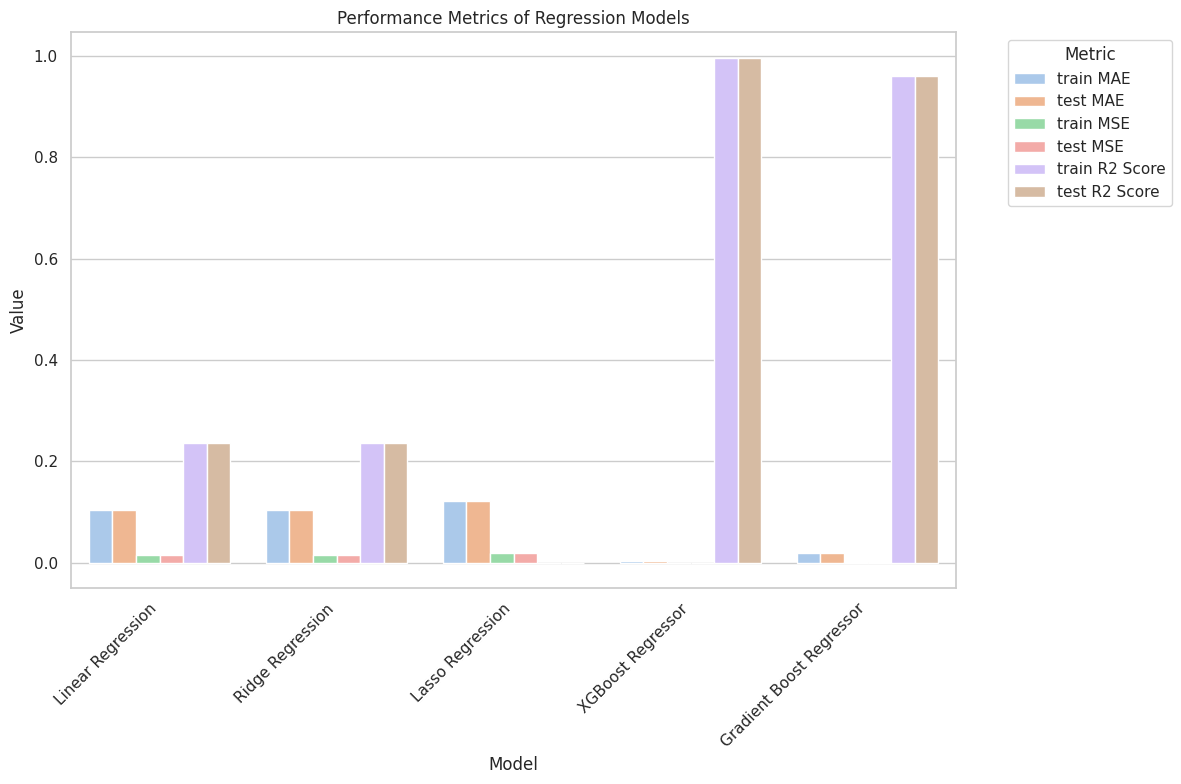

In [52]:
# Create a DataFrame for the results
df_results_1 = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regressor', 'Gradient Boost Regressor'],
    'train MAE': [lr1_mae_train, ridge1_mae_train, lasso1_mae_train, xgb1_mae_train, gb1_mae_train],
    'test MAE': [lr1_mae, ridge1_mae, lasso1_mae, xgb1_mae, gb1_mae],
    'train MSE': [lr1_mse_train, ridge1_mse_train, lasso1_mse_train, xgb1_mse_train, gb1_mse_train],
    'test MSE': [lr1_mse, ridge1_mse, lasso1_mse, xgb1_mse, gb1_mse],
    'train R2 Score': [lr1_r2_train, ridge1_r2_train, lasso1_r2_train, xgb1_r2_train, gb1_r2_train],
    'test R2 Score': [lr1_r2, ridge1_r2, lasso1_r2, xgb1_r2, gb1_r2],
})

# Melt the DataFrame to plot all factors
df_results_1_melted = df_results_1.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df_results_1_melted, x='Model', y='Value', hue='Metric')
plt.title('Performance Metrics of Regression Models')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

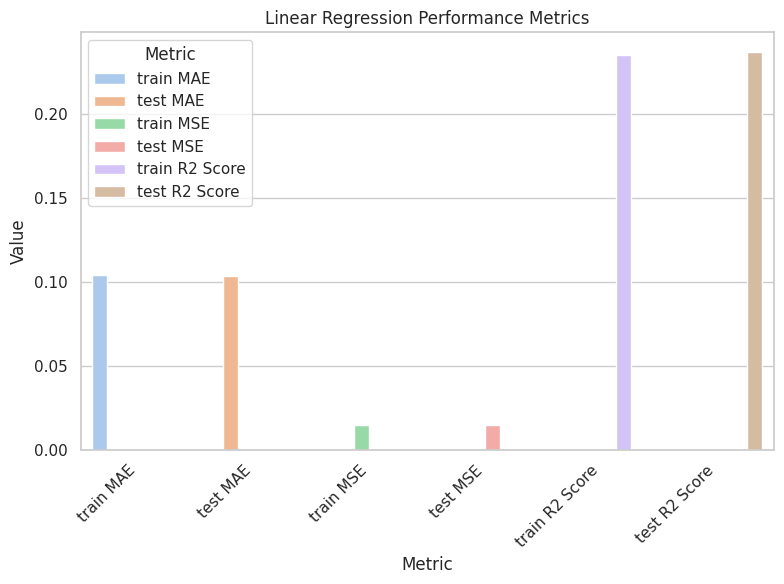

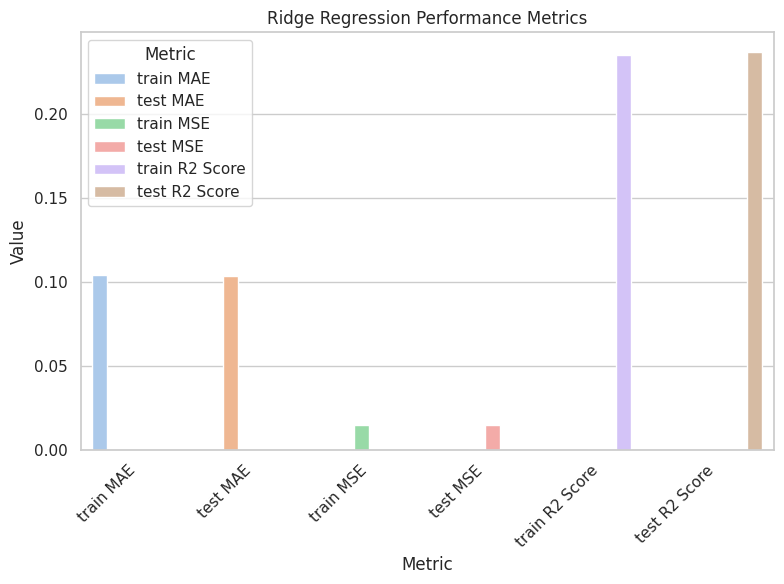

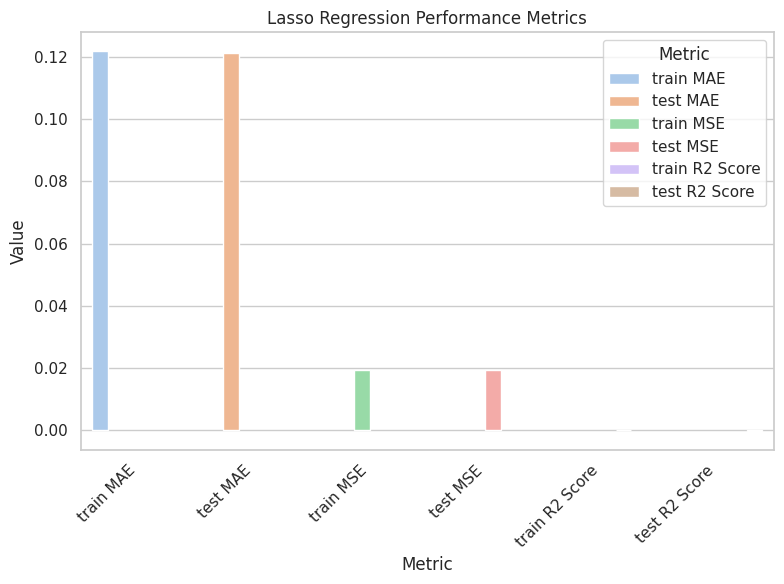

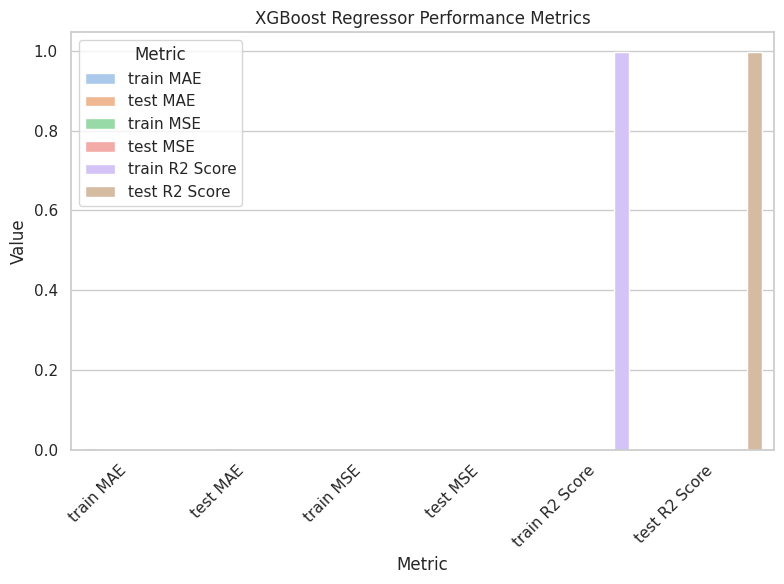

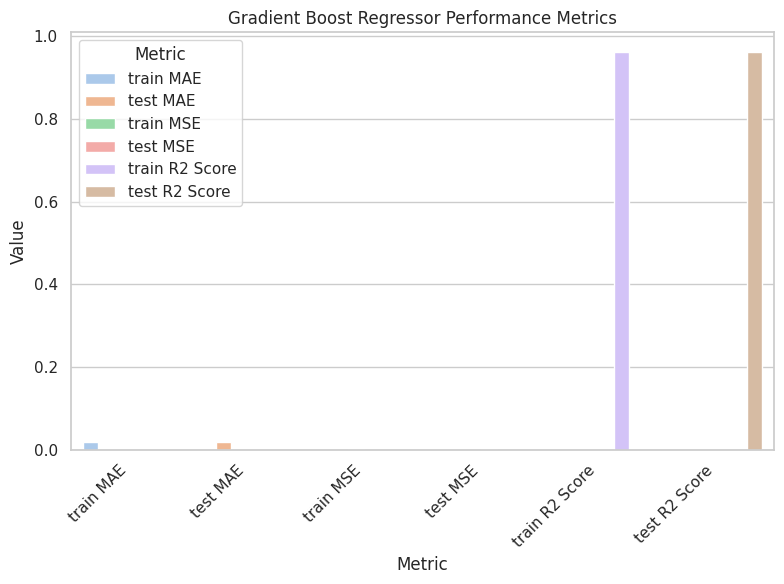

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the results
df_results_1 = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regressor', 'Gradient Boost Regressor'],
    'train MAE': [lr1_mae_train, ridge1_mae_train, lasso1_mae_train, xgb1_mae_train, gb1_mae_train],
    'test MAE': [lr1_mae, ridge1_mae, lasso1_mae, xgb1_mae, gb1_mae],
    'train MSE': [lr1_mse_train, ridge1_mse_train, lasso1_mse_train, xgb1_mse_train, gb1_mse_train],
    'test MSE': [lr1_mse, ridge1_mse, lasso1_mse, xgb1_mse, gb1_mse],
    'train R2 Score': [lr1_r2_train, ridge1_r2_train, lasso1_r2_train, xgb1_r2_train, gb1_r2_train],
    'test R2 Score': [lr1_r2, ridge1_r2, lasso1_r2, xgb1_r2, gb1_r2],
})

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plotting individual bar plots for each model and each metric
for model in df_results_1['Model']:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df_results_1[df_results_1['Model'] == model].drop(columns='Model').melt(), x='variable', y='value', hue='variable')
    plt.title(f'{model} Performance Metrics')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.legend(title='Metric', loc='best')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

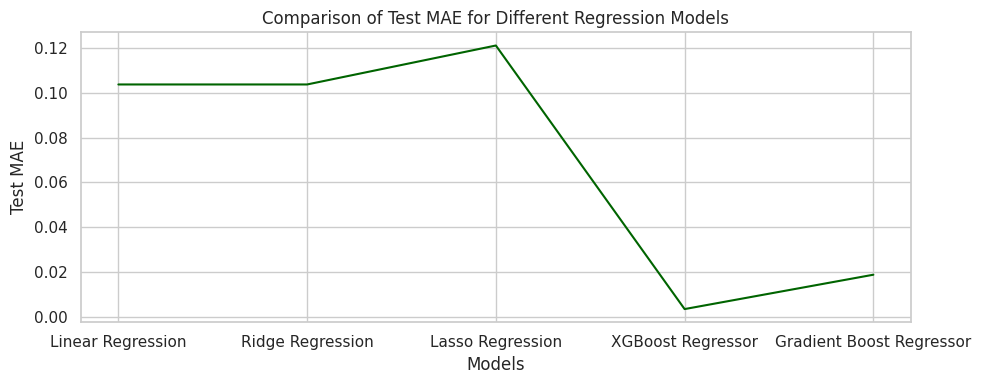

In [54]:
plt.figure(figsize=(10, 4))
plt.plot(df_results_1["Model"], df_results_1["test MAE"], color='darkgreen')
plt.xlabel('Models')
plt.ylabel('Test MAE')
plt.title('Comparison of Test MAE for Different Regression Models')
plt.tight_layout()
plt.show()

# Predicting the floral source (Pollen_analysis) 

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Label Encoding

In [56]:
label_encoder = LabelEncoder()
y_p = label_encoder.fit_transform(df['Pollen Analysis'])


In [57]:
X_p = df.drop(columns=['Pollen Analysis'])


# Spliting the Dataset

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.2, random_state=42)

# Random Forest

In [59]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Calculating The Accuracy

# Test Accuracy

In [60]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Train Accuracy

In [61]:
y_pred1 = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [62]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                precision    recall  f1-score   support

        Acacia       1.00      1.00      1.00      2614
       Alfalfa       1.00      1.00      1.00      2642
       Avocado       1.00      1.00      1.00      2619
     Blueberry       1.00      1.00      1.00      2547
        Borage       1.00      1.00      1.00      2581
     Buckwheat       1.00      1.00      1.00      2649
      Chestnut       1.00      1.00      1.00      2656
        Clover       1.00      1.00      1.00      2569
    Eucalyptus       1.00      1.00      1.00      2644
       Heather       1.00      1.00      1.00      2658
      Lavender       1.00      1.00      1.00      2624
        Manuka       1.00      1.00      1.00      2503
Orange Blossom       1.00      1.00      1.00      2612
      Rosemary       1.00      1.00      1.00      2550
          Sage       1.00      1.00      1.00      2666
     Sunflower       1.00      1.00      1.00      2700
         Thyme       1.00      1.00      1.00  

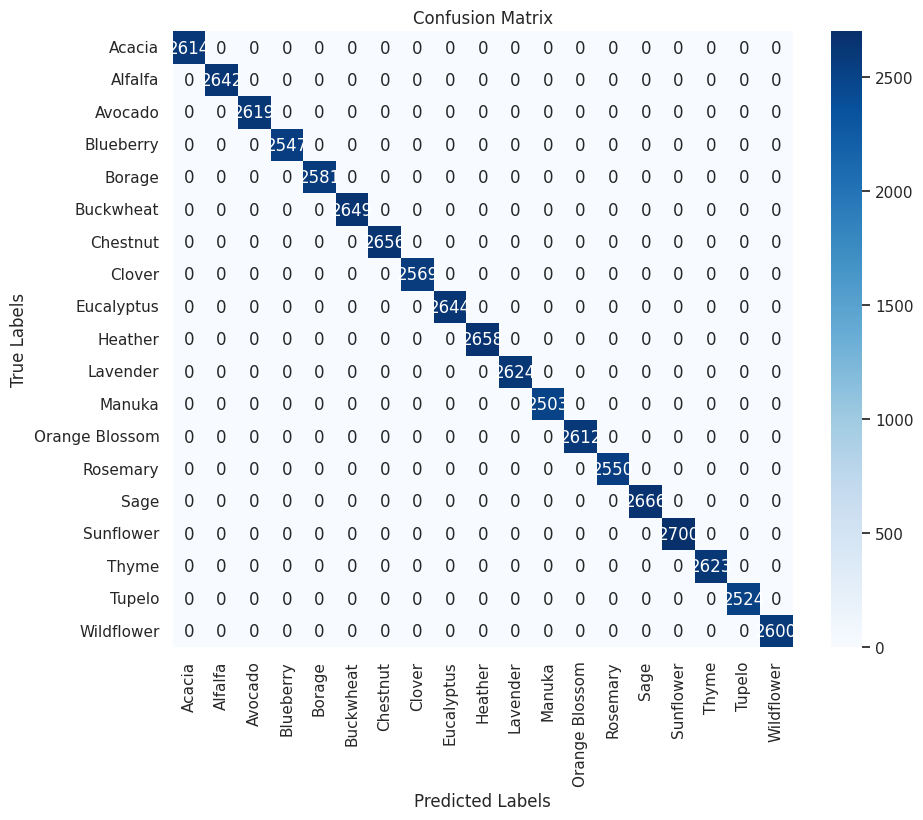

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 4: Model Evaluation
# Assuming y_test and y_pred are your true labels and predicted labels, respectively

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Gradient Boosting Classifier

In [65]:
gb2 = GradientBoostingClassifier()
gb2.fit(X_train, y_train)
gb2_pred_train = gb2.predict(X_test)
accuracy_score(y_test,gb2_pred_train)

1.0

# Logistic Regression

In [66]:
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
lr2_pred_train = lr2.predict(X_test)
accuracy_score(y_test,lr2_pred_train)

0.16998446985740506

In [67]:
report = classification_report(y_test, lr2_pred_train)

In [68]:
print(report)

              precision    recall  f1-score   support

           0       0.23      0.10      0.14      2614
           1       0.19      0.25      0.21      2642
           2       0.17      0.63      0.27      2619
           3       0.19      0.17      0.18      2547
           4       0.14      0.07      0.09      2581
           5       0.10      0.15      0.12      2649
           6       0.00      0.00      0.00      2656
           7       0.54      0.41      0.47      2569
           8       0.09      0.03      0.05      2644
           9       0.00      0.00      0.00      2658
          10       0.10      0.19      0.13      2624
          11       0.09      0.22      0.12      2503
          12       0.31      0.27      0.29      2612
          13       0.12      0.04      0.06      2550
          14       0.00      0.00      0.00      2666
          15       0.09      0.06      0.07      2700
          16       0.17      0.29      0.21      2623
          17       0.00    